<a href="https://colab.research.google.com/github/0jipy/192kbps_colab_JIPY/blob/main/%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84%ED%95%98%EC%9A%B0%EC%A7%95_%EB%AA%A8%EB%8D%B85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀  - 캘리포니아 하우징

## 모델 5

모델 py 맞추기 위해 'Califonia.h5'로 저장.

In [ ]:
model5 = Sequential([
    Dense(72, input_dim=8, activation='relu'),
    Dense(54, activation='relu'),
    Dense(45, activation='relu'),
    Dense(27, activation='relu'),
    Dense(9, activation='relu'),
    Dense(1)
])
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 72)                648       
                                                                 
 dense_1 (Dense)             (None, 54)                3942      
                                                                 
 dense_2 (Dense)             (None, 45)                2475      
                                                                 
 dense_3 (Dense)             (None, 27)                1242      
                                                                 
 dense_4 (Dense)             (None, 9)                 252       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 8,569
Trainable params: 8,569
Non-trainabl

In [ ]:
model5.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# 콜백 정의할것 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path5 = 'califonia_house5.h5'
checkpoint = ModelCheckpoint(
    model_path5, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=20)

In [ ]:
hist = model5.fit(X_train, y_train, validation_split=0.2,
                   epochs=500, batch_size=120, verbose=1,
                   callbacks=[checkpoint, early_stop])

Epoch 1/500
106/124 [========================>.....] - ETA: 0s - loss: 2495.5935
Epoch 00001: val_loss improved from inf to 3.05226, saving model to califonia_house5.h5
124/124 [==============================] - 1s 5ms/step - loss: 2136.6687 - val_loss: 3.0523
Epoch 2/500
114/124 [==========================>...] - ETA: 0s - loss: 1.9821
Epoch 00002: val_loss improved from 3.05226 to 1.33693, saving model to califonia_house5.h5
124/124 [==============================] - 0s 4ms/step - loss: 1.9247 - val_loss: 1.3369
Epoch 3/500
123/124 [============================>.] - ETA: 0s - loss: 1.4168
Epoch 00003: val_loss did not improve from 1.33693
124/124 [==============================] - 0s 3ms/step - loss: 1.4186 - val_loss: 1.4998
Epoch 4/500
112/124 [==========================>...] - ETA: 0s - loss: 1.3783
Epoch 00004: val_loss did not improve from 1.33693
124/124 [==============================] - 0s 3ms/step - loss: 1.3714 - val_loss: 1.3565
Epoch 5/500
124/124 [=======================

In [ ]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

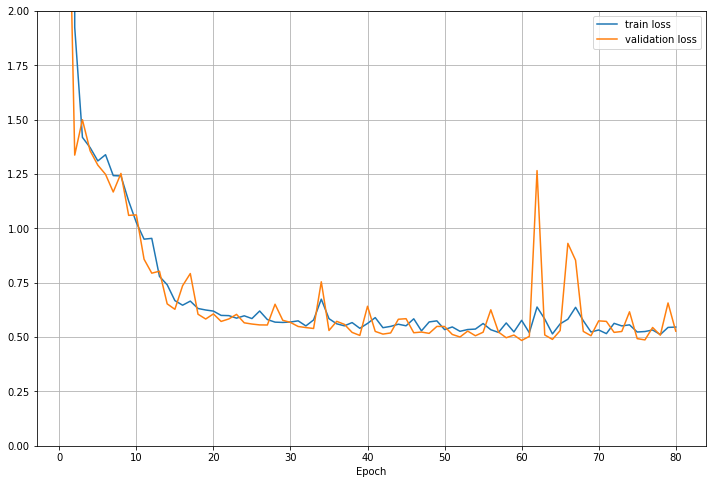

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,2])
plt.xlabel('Epoch')
plt.show()

In [ ]:
# 아무래도 성능차이가 있어보여? 코랩의 문제? pc 하드웨어의 문제?

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
pred5 = model5.predict(X_test)
mean_squared_error(y_test, pred5), r2_score(y_test, pred5)

(0.5293536925391349, 0.5875446770391635)

## 예측치 비교 : 임시라서 pred5만

In [ ]:
df = pd.DataFrame({
    'y_test':y_test, 'pred5':pred5.flatten()
})
df.head(10)

,y_test,pred5
0,4.771,4.539354
1,1.371,1.195279
2,1.233,1.801453
3,0.938,1.373376
4,3.260,3.757412
5,1.516,1.530638
6,2.738,2.539587
7,1.368,1.883620
8,1.175,1.151200
9,2.966,3.224689


In [ ]:
df.describe()
# 수치 확인하기 좋을것.

,y_test,pred5
count,2064.000000,2064.000000
mean,2.002142,2.214563
std,1.133156,0.905811
min,0.149990,0.043445
25%,1.138250,1.508429
50%,1.735000,2.034637
75%,2.561750,2.777247
max,5.000010,6.040096


In [ ]:
# 다시 모델저장 이름은 캘5
model5.save('Califonia.h5')

## 테스트 프로그램

In [ ]:
index = 9
X_test[index], y_test[index]

(array([   5.1587    ,   36.        ,    5.99692308,    0.98153846,
         909.        ,    2.79692308,   33.94      , -118.11      ]), 2.966)

In [ ]:
model5.predict(X_test[index].reshape(1,-1))

array([[3.224687]], dtype=float32)

In [ ]:
# 역시 모델값이 다른긴 하다.
pred_value = model5.predict(X_test[index].reshape(1,-1)) # 2차원 값 입력 必 KS마크? 검사필??
print(f'실제값 : {y_test[index]}, 예측값 : {pred_value[0,0]:.2f}, 오차 : {y_test[index] - pred_value[0,0]:.2f}')

실제값 : 2.966, 예측값 : 3.22, 오차 : -0.26


## 여기서부터 원래 캘리포니아 하우징

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [3]:
df = pd.DataFrame(house.data, columns=house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# pd.read_csv('housing.csv')

- train/test dataset 분리

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.1,  random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18576, 8), (2064, 8), (18576,), (2064,))

모델 정의/설정/학습

In [6]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                180       
                                                                 
 dense_7 (Dense)             (None, 8)                 168       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
149/149 [==============================] - 1s 3ms/step - loss: 3252.4675 - val_loss: 16.3181
Epoch 2/100
149/149 [==============================] - 0s 2ms/step - loss: 9.1853 - val_loss: 4.0825
Epoch 3/100
149/149 [==============================] - 0s 2ms/step - loss: 4.3252 - val_loss: 3.3636
Epoch 4/100
149/149 [==============================] - 0s 2ms/step - loss: 3.5306 - val_loss: 2.9073
Epoch 5/100
149/149 [==============================] - 0s 2ms/step - loss: 3.0287 - val_loss: 2.5256
Epoch 6/100
149/149 [==============================] - 0s 2ms/step - loss: 2.6061 - val_loss: 2.2336
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 2.2879 - val_loss: 2.0361
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 1.9461 - val_loss: 1.9423
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 1.6912 - val_loss: 1.5736
Epoch 10/100
149/149 [==============================] - 0s 3ms/step - loss: 1.5223 - va

- 시각화 한 후 어떻게 해야할지

In [ ]:
# 5번째 부터 데이터 보기 

In [ ]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

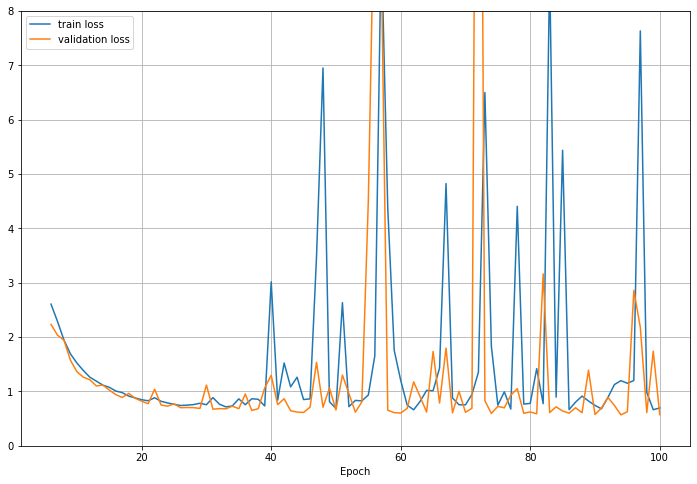

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, ms=5, label='train loss')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylim([0,8])
plt.show()

- loss 최대값 8.7456 

In [ ]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

## case 2 ) 모델 재정의 , 콜백 함수 사용 

In [ ]:
# 항아리식으로 가보자 feat ms.park
model2 = Sequential([
    Dense(10, input_dim=8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(6, activation='relu'),
    Dense(1)
])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 16)                176       
                                                                 
 dense_11 (Dense)            (None, 6)                 102       
                                                                 
 dense_12 (Dense)            (None, 1)                 7         
                                                                 
Total params: 375
Trainable params: 375
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 옵티마이저 알엠에스 프롬. 
model2.compile(optimizer='rmsprop', loss='mean_squared_error')

In [ ]:
# 콜백 정의할것 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model_path = 'california_house2.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=20)

In [ ]:
# fit.transform 없는 버전들 체크할 것 . 120번까지 돌고 스탑 됨. 시가가화 후 수정핼 볼것. 
hist2 = model2.fit(X_train, y_train, validation_split=0.2, 
                   epochs=1000, batch_size=128, verbose=0,
                   callbacks=[checkpoint, early_stop])


Epoch 00001: val_loss improved from inf to 3.70977, saving model to california_house2.h5

Epoch 00002: val_loss improved from 3.70977 to 1.57063, saving model to california_house2.h5

Epoch 00003: val_loss did not improve from 1.57063

Epoch 00004: val_loss improved from 1.57063 to 1.47015, saving model to california_house2.h5

Epoch 00005: val_loss improved from 1.47015 to 1.39385, saving model to california_house2.h5

Epoch 00006: val_loss did not improve from 1.39385

Epoch 00007: val_loss did not improve from 1.39385

Epoch 00008: val_loss improved from 1.39385 to 1.31339, saving model to california_house2.h5

Epoch 00009: val_loss improved from 1.31339 to 1.23469, saving model to california_house2.h5

Epoch 00010: val_loss did not improve from 1.23469

Epoch 00011: val_loss did not improve from 1.23469

Epoch 00012: val_loss did not improve from 1.23469

Epoch 00013: val_loss did not improve from 1.23469

Epoch 00014: val_loss improved from 1.23469 to 1.10098, saving model to cal

In [ ]:
y_loss = hist2.history['loss']
y_vloss = hist2.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

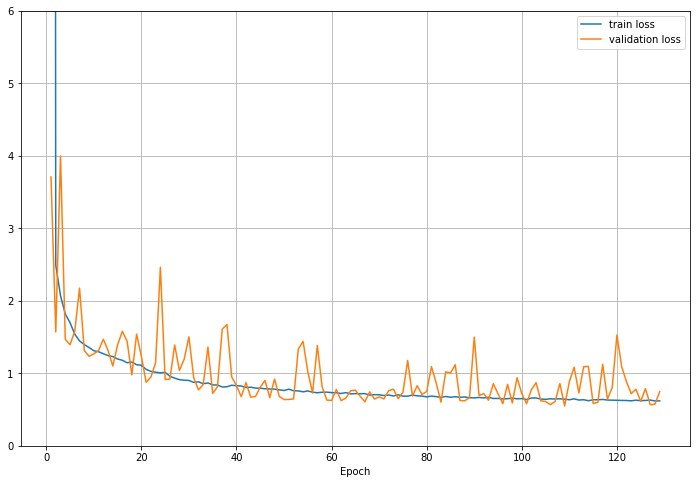

In [ ]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, ms=5, label='train loss')
plt.plot(xs, y_vloss, ms=5, label='validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylim([0,6]) # 수업버전하고 다르게 내껀 첫 loss 70 나와서 y값 제한 둠.
plt.show()

- 평가  성능 다운된 수업과 반대방향인데 수정 해볼것. 

In [ ]:
pred = model.predict(X_test)
pred2 = model2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, pred), r2_score(y_test, pred)
# (0.5720062522230401, 0.5543111782887399)

(0.5720062522230401, 0.5543111782887399)

In [ ]:
mean_squared_error(y_test, pred2), r2_score(y_test, pred2)
# (0.735398467219512, 0.4270012345677485)

(0.735398467219512, 0.4270012345677485)

- 예측치 비교

In [ ]:
df = pd.DataFrame({
    'y_test' : y_test, 'pred' : pred.flatten(), 'pred2' : pred2.flatten()
})
df.head(10)

,y_test,pred,pred2
0,4.771,4.478663,3.342354
1,1.371,1.599329,1.008789
2,1.233,1.791254,1.155702
3,0.938,1.470179,1.045247
4,3.260,3.132139,2.785170
5,1.516,1.708559,1.301715
6,2.738,2.489752,1.954634
7,1.368,1.851435,1.396458
8,1.175,0.985979,0.862199
9,2.966,2.846880,2.501725


## 모델 5

모델 py 맞추기 위해 'Califonia.h5'로 저장.

In [9]:
model5 = Sequential([
    Dense(72, input_dim=8, activation='relu'),
    Dense(54, activation='relu'),
    Dense(45, activation='relu'),
    Dense(27, activation='relu'),
    Dense(9, activation='relu'),
    Dense(1)
])
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 72)                648       
                                                                 
 dense_1 (Dense)             (None, 54)                3942      
                                                                 
 dense_2 (Dense)             (None, 45)                2475      
                                                                 
 dense_3 (Dense)             (None, 27)                1242      
                                                                 
 dense_4 (Dense)             (None, 9)                 252       
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 8,569
Trainable params: 8,569
Non-trainabl

In [10]:
model5.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# 콜백 정의할것 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_path5 = 'califonia_house5.h5'
checkpoint = ModelCheckpoint(
    model_path5, monitor='val_loss', verbose=1, save_best_only=True
)
early_stop = EarlyStopping(patience=20)

In [13]:
hist = model5.fit(X_train, y_train, validation_split=0.2,
                   epochs=500, batch_size=120, verbose=1,
                   callbacks=[checkpoint, early_stop])

Epoch 1/500
106/124 [========================>.....] - ETA: 0s - loss: 2495.5935
Epoch 00001: val_loss improved from inf to 3.05226, saving model to califonia_house5.h5
124/124 [==============================] - 1s 5ms/step - loss: 2136.6687 - val_loss: 3.0523
Epoch 2/500
114/124 [==========================>...] - ETA: 0s - loss: 1.9821
Epoch 00002: val_loss improved from 3.05226 to 1.33693, saving model to califonia_house5.h5
124/124 [==============================] - 0s 4ms/step - loss: 1.9247 - val_loss: 1.3369
Epoch 3/500
123/124 [============================>.] - ETA: 0s - loss: 1.4168
Epoch 00003: val_loss did not improve from 1.33693
124/124 [==============================] - 0s 3ms/step - loss: 1.4186 - val_loss: 1.4998
Epoch 4/500
112/124 [==========================>...] - ETA: 0s - loss: 1.3783
Epoch 00004: val_loss did not improve from 1.33693
124/124 [==============================] - 0s 3ms/step - loss: 1.3714 - val_loss: 1.3565
Epoch 5/500
124/124 [=======================

In [14]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

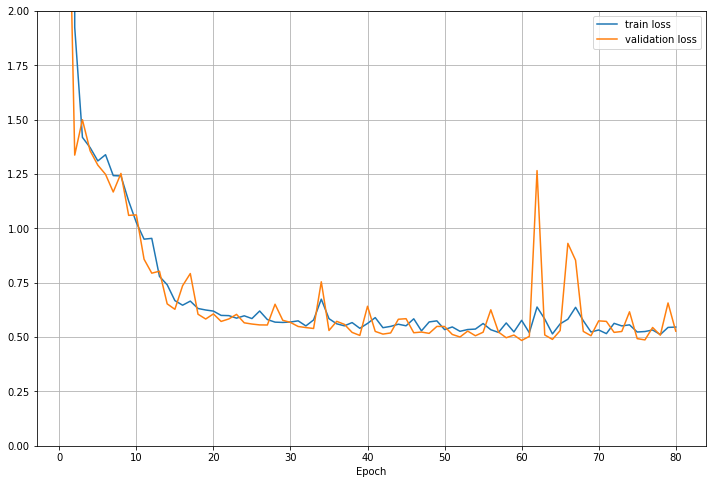

In [15]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_loss, label='train loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,2])
plt.xlabel('Epoch')
plt.show()

In [ ]:
# 아무래도 성능차이가 있어보여? 코랩의 문제? pc 하드웨어의 문제?

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
pred5 = model5.predict(X_test)
mean_squared_error(y_test, pred5), r2_score(y_test, pred5)

(0.5293536925391349, 0.5875446770391635)

## 예측치 비교 : 임시라서 pred5만

In [19]:
df = pd.DataFrame({
    'y_test':y_test, 'pred5':pred5.flatten()
})
df.head(10)

,y_test,pred5
0,4.771,4.539354
1,1.371,1.195279
2,1.233,1.801453
3,0.938,1.373376
4,3.260,3.757412
5,1.516,1.530638
6,2.738,2.539587
7,1.368,1.883620
8,1.175,1.151200
9,2.966,3.224689


In [20]:
df.describe()
# 수치 확인하기 좋을것.

,y_test,pred5
count,2064.000000,2064.000000
mean,2.002142,2.214563
std,1.133156,0.905811
min,0.149990,0.043445
25%,1.138250,1.508429
50%,1.735000,2.034637
75%,2.561750,2.777247
max,5.000010,6.040096


In [21]:
# 다시 모델저장 이름은 캘5
model5.save('Califonia.h5')

## 테스트 프로그램

In [22]:
index = 9
X_test[index], y_test[index]

(array([   5.1587    ,   36.        ,    5.99692308,    0.98153846,
         909.        ,    2.79692308,   33.94      , -118.11      ]), 2.966)

In [23]:
model5.predict(X_test[index].reshape(1,-1))

array([[3.224687]], dtype=float32)

In [24]:
# 역시 모델값이 다른긴 하다.
pred_value = model5.predict(X_test[index].reshape(1,-1)) # 2차원 값 입력 必 KS마크? 검사필??
print(f'실제값 : {y_test[index]}, 예측값 : {pred_value[0,0]:.2f}, 오차 : {y_test[index] - pred_value[0,0]:.2f}')

실제값 : 2.966, 예측값 : 3.22, 오차 : -0.26
